In [1]:
from src.tokenizers import *
import os
from src.sascorer import *

from rdkit.Chem import MolFromSmiles, QED

from IPython.display import display
import json
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import pearsonr, spearmanr

In [2]:

tokenizer = GroupSelfiesTokenizer("tokens/zinc_gs_grammar.txt")

In [ ]:

def score_smile(s):
    mol = Chem.MolFromSmiles(s)
    sa = calculateScore(mol)
    qed = QED.qed(mol)
    return sa, qed

def print_info_gs(s, sa, qed):
    enc = tokenizer.encoder(s)
    mol= tokenizer.grammar.decoder(enc)
    print("SA", sa)
    print("QA", )
    print("GroupSelfies: ", enc)
    print("Selfies: ", sf.encoder(s))
    display(mol)

In [77]:
gen_mols = pickle.load(open("temp_outs/gen_mols_selfies.pkl","rb"))

props = []
for i in range(len(gen_mols)):
    sa, qed = score_smile(gen_mols[i][1])
    props.append([gen_mols[i][0], sa, qed])

props_sf = np.array(props)

print(len(props_sf))
print("Spearman R; selfies; BA vs SA", spearmanr(props_sf[:,0], props_sf[:,1]))
print("Spearman R; selfies; BA vs QED", spearmanr(props_sf[:,0], props_sf[:,2]))


Spearman R; selfies; BA vs SA SignificanceResult(statistic=-0.4040750544483567, pvalue=1.3229850074232018e-13)
Spearman R; selfies; BA vs QED SignificanceResult(statistic=-0.43842071997358295, pvalue=5.413255415460568e-16)


In [88]:
gen_mols = pickle.load(open("temp_outs/gen_mols_gs_zinc.pkl","rb"))

props = []
for i in range(len(gen_mols)):
    sa, qed = score_smile(gen_mols[i][1])
    props.append([gen_mols[i][0], sa, qed])

props_gs_zinc = np.array(props)


print(len(props_gs_zinc))
print("Spearman R; group-selfies zinc; BA vs SA", spearmanr(props_gs_zinc[:,0], props_gs_zinc[:,1]))
print("Spearman R; group-selfies zinc; BA vs QED", spearmanr(props_gs_zinc[:,0], props_gs_zinc[:,2]))

Spearman R; group-selfies zinc; BA vs SA SignificanceResult(statistic=-0.4576572412696392, pvalue=1.5382104487417086e-18)
Spearman R; group-selfies zinc; BA vs QED SignificanceResult(statistic=-0.026256107963458557, pvalue=0.6341007503147635)


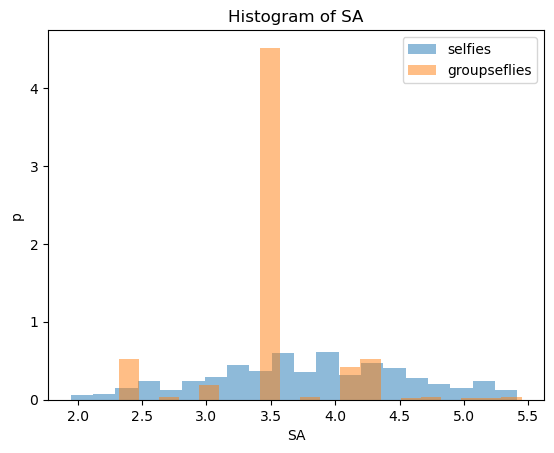

In [94]:
plt.figure()
plt.title("Histogram of SA")
plt.hist(props_sf[:, 1], 20, alpha=0.5, density=True, label="selfies")
plt.hist(props_gs_zinc[:, 1], 20, alpha=0.5, density=True, label="groupseflies")
plt.xlabel("SA")
plt.ylabel("p")
plt.legend()
plt.show()

In [ ]:
ss = ["CC[C@H](C)CN(C)[C@@H]1CC(=O)c2sc(OC(=O)[C@H](C)NC(C)=O)nc2C1", 
      "[CH]C1(P[C@](C)(O)[C@H](C)CC)CC(=O)c2sc(Br)nc2C1", 
      "CC[C@@H](C)[C@@](C)(O)c1nn(Br)c2c1C(=O)C[C@H](Br)C2"]

for s in ss:
    score_smile(s)

In [ ]:
def clean_smarts(x):
    return Chem.MolFromSmiles(sf.decoder(sf.encoder(Chem.MolToSmiles(Chem.MolFromSmarts(x)))))

In [ ]:
display(clean_smarts("[CH0;$(C-[#6]):1]"))
display(clean_smarts("[NH0:2]"))

display(clean_smarts("[C:1]1=[N:2]-N-N=N-1"))

In [ ]:
rxn_string = "[CH3:14][NH2:15].[N+:1](=[O:2])([O-:3])[c:4]1[cH:5][c:6]([C:7](=[O:8])[OH:9])[cH:10][cH:11][c:12]1[Cl:13].[OH2:16]>>[N+:1](=[O:2])([O-:3])[c:4]1[cH:5][c:6]([C:7](=[O:8])[OH:9])[cH:10][cH:11][c:12]1[NH:15][CH3:14]"

for x in rxn_string.split(">>"):
    for u in x.split("."):
        display(Chem.MolFromSmiles(sf.decoder(sf.encoder(u))))

In [18]:
x = pickle.load(open("property_models/sa_gs_zinc_x", "rb"))

In [19]:
x

tensor([[0.0032, 0.0032, 0.0034,  ..., 0.0034, 0.0034, 0.0034],
        [0.0032, 0.0032, 0.0034,  ..., 0.0034, 0.0033, 0.0033],
        [0.0033, 0.0033, 0.0034,  ..., 0.0034, 0.0033, 0.0032],
        ...,
        [0.0032, 0.0032, 0.0034,  ..., 0.0033, 0.0034, 0.0033],
        [0.0033, 0.0032, 0.0034,  ..., 0.0034, 0.0034, 0.0033],
        [0.0032, 0.0033, 0.0034,  ..., 0.0035, 0.0034, 0.0034]])

In [15]:
import torch
from src.models import *

vae = VAE(max_len=75, vocab_len=304, latent_dim=1024, embedding_dim=64).to(torch.device("cpu"))
vae.load_state_dict(torch.load(f'vae_gs_zinc.pt'))
vae.eval()   
torch.exp(vae.decode(torch.randn(10, 1024))).std()

tensor(0.0001, grad_fn=<StdBackward0>)

In [14]:
vae = VAE(max_len=72, vocab_len=108, latent_dim=1024, embedding_dim=64).to(torch.device("cpu"))
vae.load_state_dict(torch.load(f'vae_selfies.pt'))
vae.eval()   
torch.exp(vae.decode(torch.randn(10, 1024))).std()

tensor(0.0839, grad_fn=<StdBackward0>)

In [2]:
from src.models import *
vae = VAE(max_len=72, vocab_len=108, latent_dim=1024, embedding_dim=64).to(torch.device("cpu"))
vae.decode(torch.randn(10, 1024)).mean()

tensor(-4.6958, grad_fn=<MeanBackward0>)